In [1]:
import pandas as pd
import IPython
import numpy as np
import matplotlib.pyplot as plt

import pre_processing
import analysis
import config

import importlib
importlib.reload(pre_processing)
importlib.reload(analysis)

<module 'analysis' from '/Users/anasputhawala/Desktop/Winterproj/src/utils/analysis.py'>

### Loading data

In [2]:
text_file_loc = '/Users/anasputhawala/Desktop/Winterproj/data/data_crawled/tweet_by_ID_17_12_2022__06_18_38.txt.text'
label_file_loc = '/Users/anasputhawala/Desktop/Winterproj/data/data_crawled/tweet_by_ID_17_12_2022__06_18_38.txt.labels'
scraped_tweets_df = pre_processing.sculpt_df(text_file_loc = text_file_loc, labels_loc = label_file_loc)
scraped_tweets_df = pre_processing.convert_to_int(df=scraped_tweets_df)
scraped_tweets_df

,Text,Label
0,Step out and explore. # ️ @ Ellis Island Cafe,0
1,@user @ Cathedral Preparatory School,18
2,RuPaul's Drag Race bingo fun. Drag Queens be S...,9
3,Black History like a Mufffffaaaaaka #blacchyna...,2
4,@ BJ's Restaurant and Brewhouse,8
...,...,...
372435,Couldn't be more stoked to see mama tayblazesc...,9
372436,Dinner indian food (@ Bombay Curry in Melbourne),1
372437,'Tis the season @ Starbucks,17
372438,We voted! #election2016 #vote #proudtobeanamer...,11


Here is what the labels are:

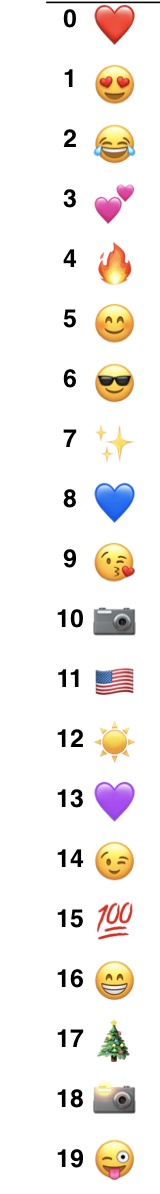

In [3]:
ss_path = '/Users/anasputhawala/Desktop/Winterproj/data/emoji_labels.png'
IPython.display.Image(ss_path)

In [4]:
scraped_tweets_df.Label.value_counts()

0     79923
1     39391
2     38953
4     19473
3     19212
5     17788
6     16590
7     13317
10    12574
9     12251
8     12148
11    11326
15    10435
18    10286
14    10274
12    10080
16    10051
17     9573
13     9465
19     9330
Name: Label, dtype: int64

Few things we can do:
1. Combine labels 13, 8, and 0 into just 0 (red heart)
2. View characteristics of text for all of the different labels (i.e. how much words are in the tweet, which word is most common, etc.)
3. Perform some text-processing perhaps as needed (i.e. removing stop-words, substituting characters for words (@, &), expanding contractions (shouldn't -> should not...))

After this we might want to look into under-sampling to build out a more balanced dataset

1.

In [5]:
scraped_tweets_df = pre_processing.combine_labels(df=scraped_tweets_df, labels_to_combine=[13,8,0])

In [6]:
scraped_tweets_df.Label.value_counts()

0     101536
1      39391
2      38953
4      19473
3      19212
5      17788
6      16590
7      13317
10     12574
9      12251
11     11326
15     10435
18     10286
14     10274
12     10080
16     10051
17      9573
19      9330
Name: Label, dtype: int64

### Text analytics + Pre-processing

Finding out how many words on average per emoji

In [7]:
# Tokenize the text and save it in a series
tokenized_text_series = scraped_tweets_df.Text.apply(lambda row: pre_processing.tokenize(row, lowercase=True))

In [ ]:
# Now we can sum the number of elements up per row in that new column with tokenized text
tokenized_text_series

0            [step, out, and, explore, ellis, island, cafe]
1                    [user, cathedral, preparatory, school]
2         [rupauls, drag, race, bingo, fun, drag, queens...
3         [black, history, like, a, mufffffaaaaaka, blac...
4                         [bjs, restaurant, and, brewhouse]
                                ...                        
372435    [couldnt, be, more, stoked, to, see, mama, tay...
372436    [dinner, indian, food, bombay, curry, in, melb...
372437                        [tis, the, season, starbucks]
372438    [we, voted, election2016, vote, proudtobeaname...
372439    [retired, jerseys, wheres, chris, webbers, jer...
Name: Text, Length: 372440, dtype: object

In [ ]:
# Get the number of elements in each row of the tokenized text series and save it as num elements
num_elements = tokenized_text_series.apply(lambda row: len(row))

/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from current font.
  func(*args, **kwargs)
/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  func(*args, **kwargs)
/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128247 (\N{CAMERA}) missing from current font.
  func(*args, **kwargs)
/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from current font.
  func(*args, **kwargs)
/Users/anasput

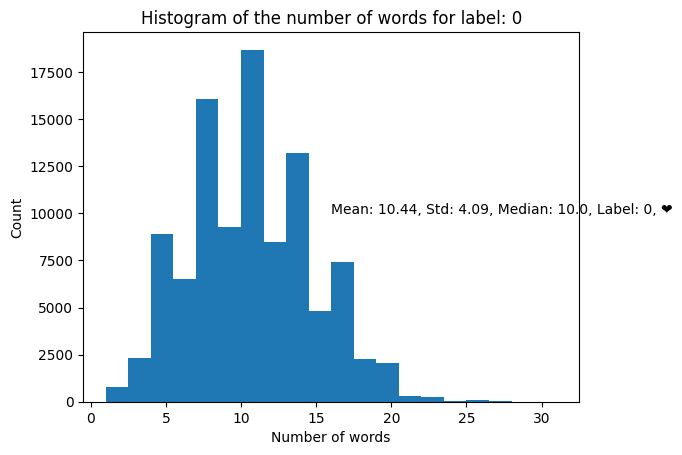

/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


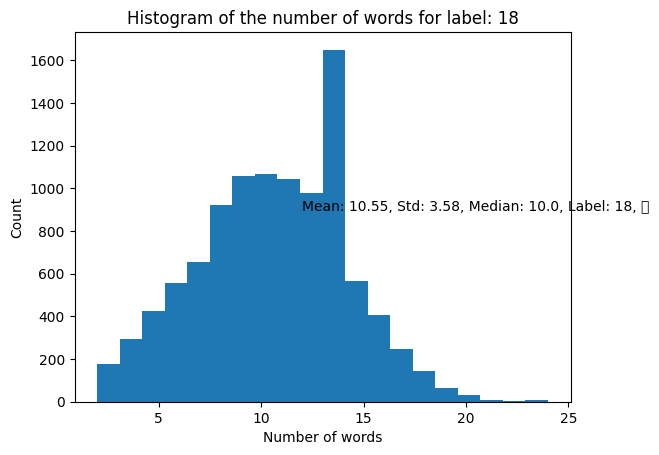

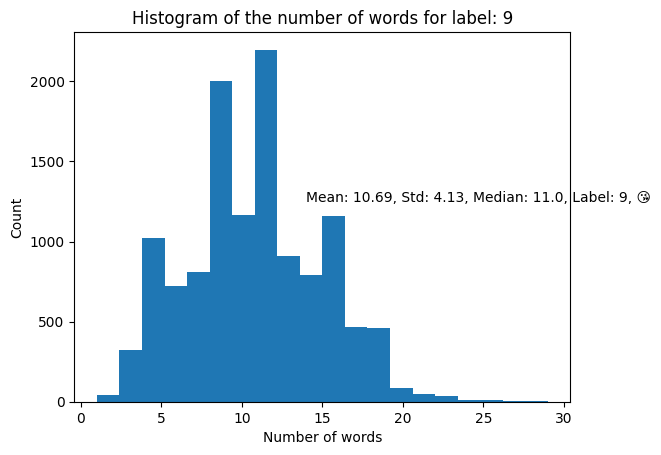

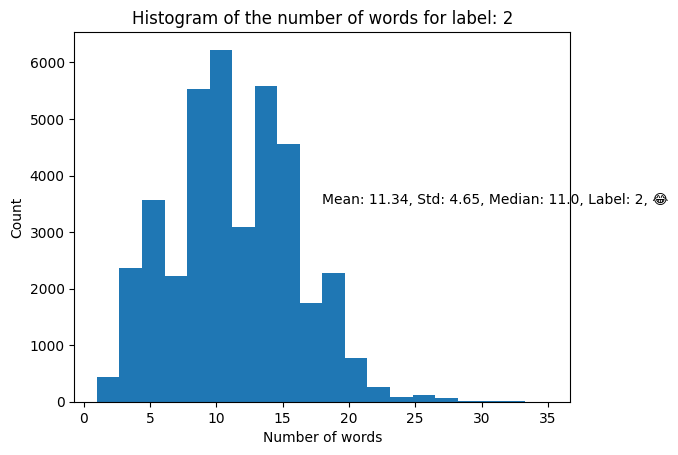

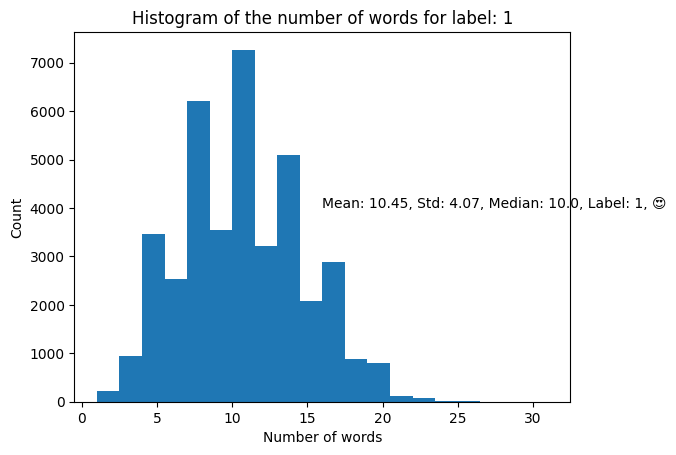

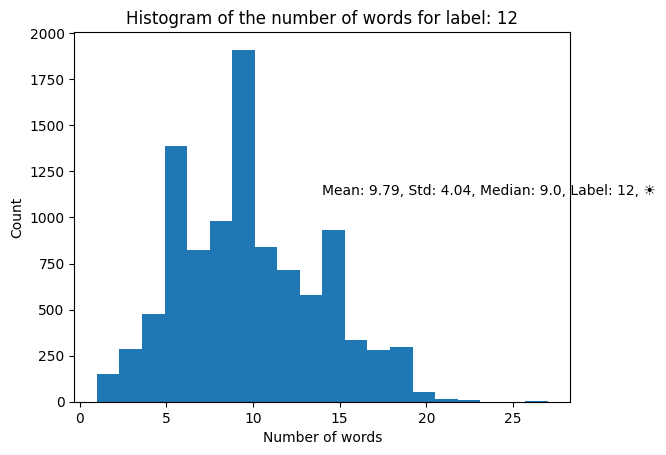

/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


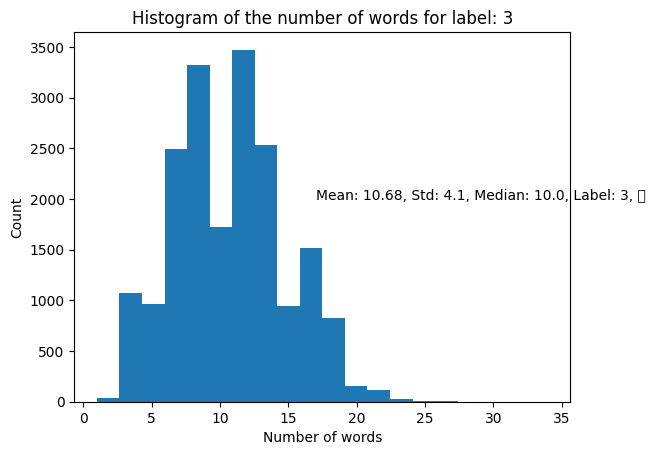

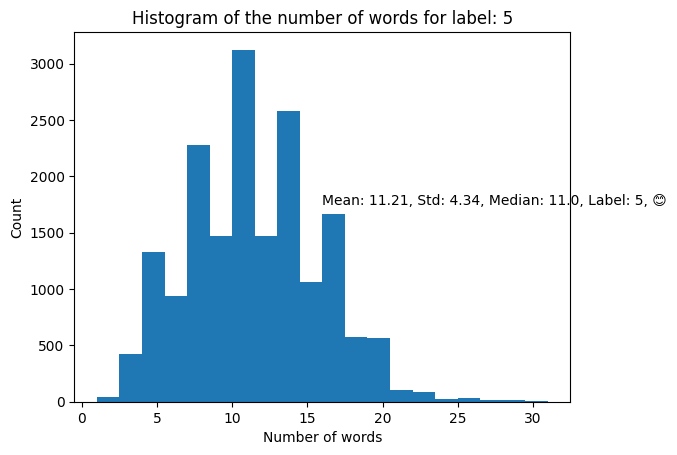

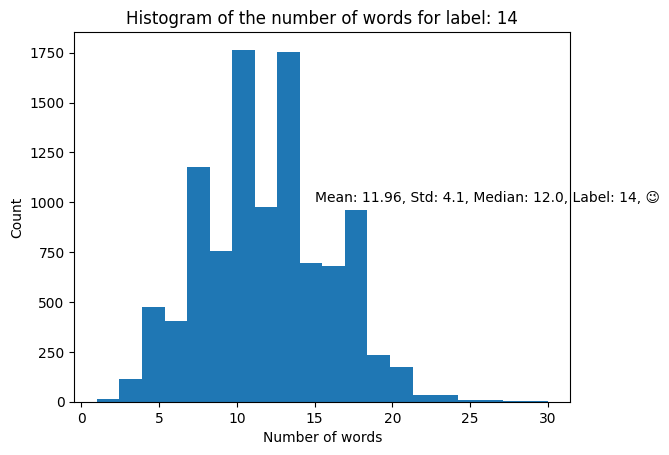

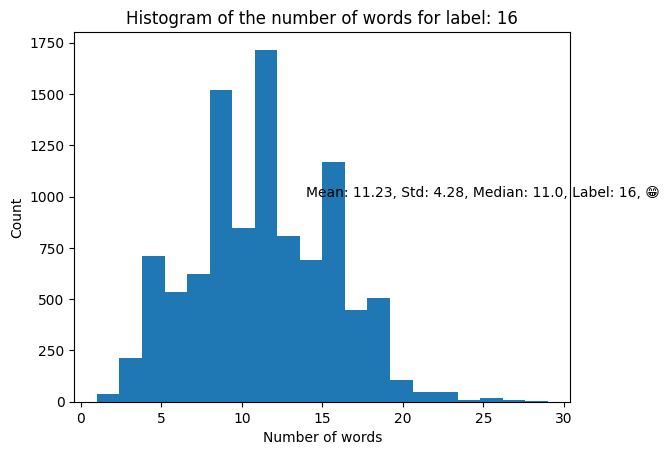

/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128247 (\N{CAMERA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


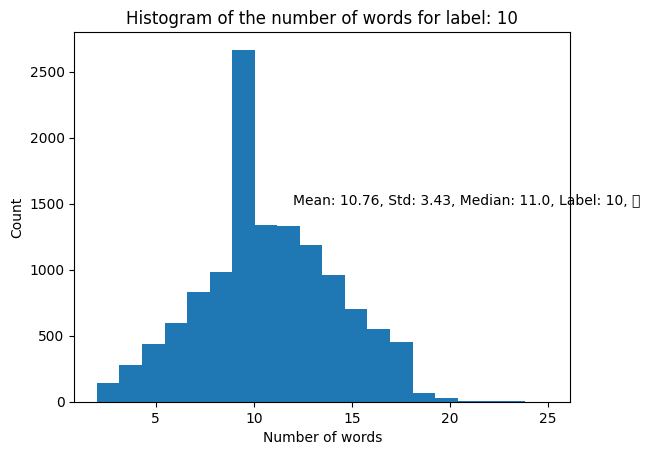

/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


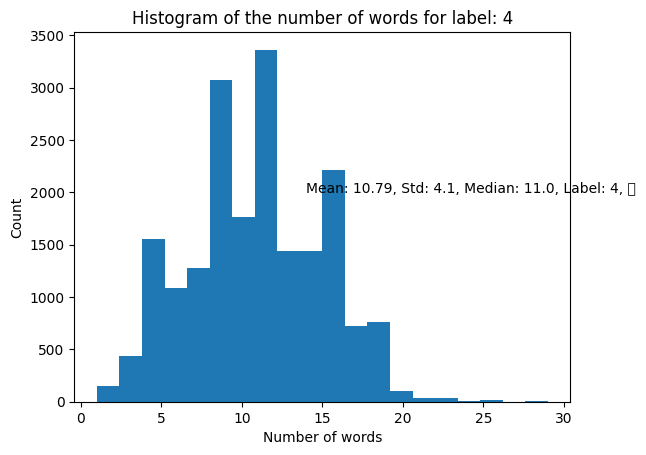

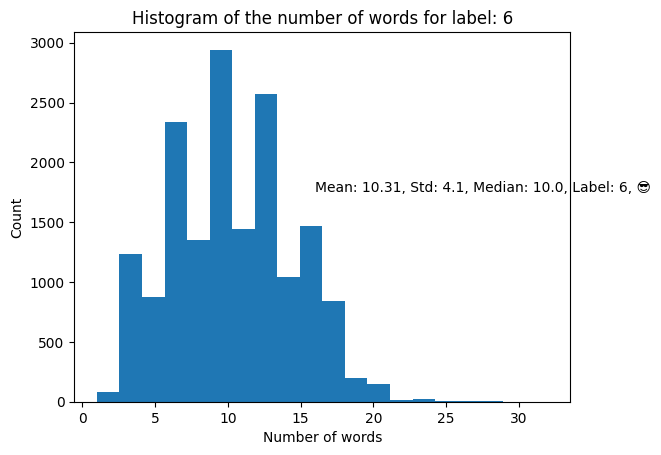

/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


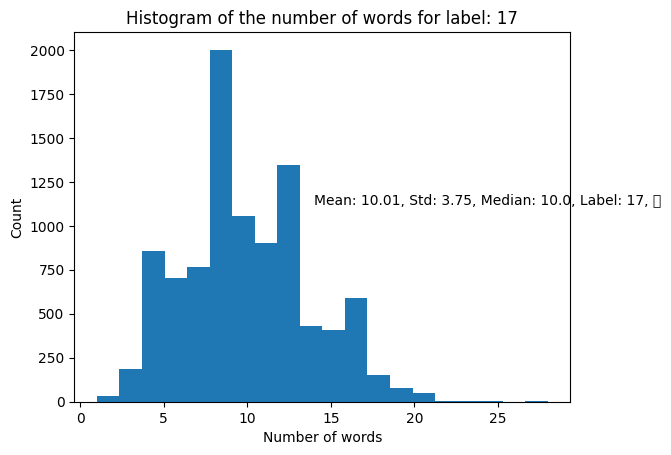

/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128175 (\N{HUNDRED POINTS SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


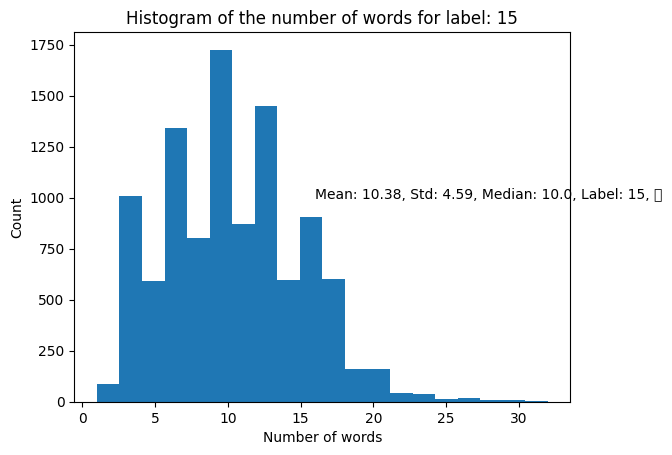

/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


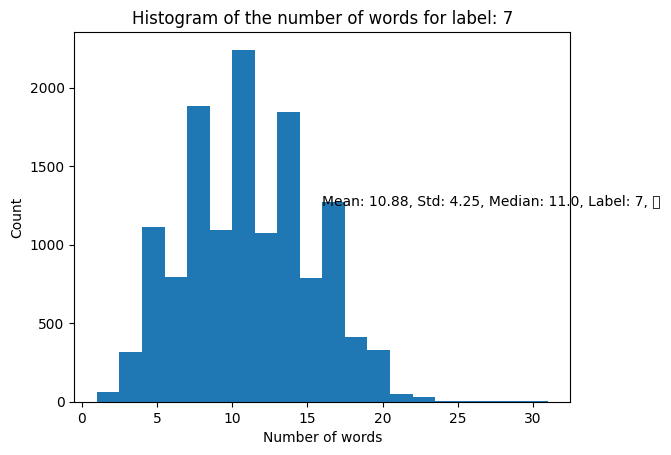

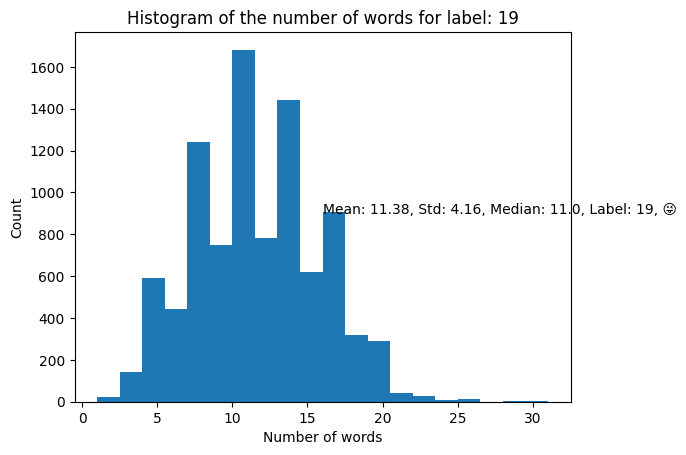

/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/anasputhawala/Desktop/Winterproj/emojify/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


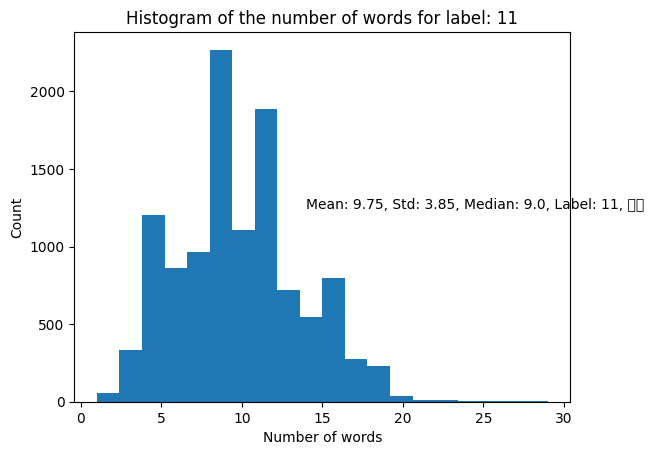

In [ ]:
all_labels = scraped_tweets_df.Label.unique()
analysis.plot_average_num_words(num_elements=num_elements, original_df=scraped_tweets_df, labels_to_analyze=all_labels, num_bins=20)

Conclusions:
blah